# Heart Failure Prediction

## Import Libraries and Read data

In [544]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
# import libraries for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

from sklearn.metrics import classification_report, roc_auc_score

In [545]:
df = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [546]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Getting the categorical columns and continuous columns

In [547]:
categorical_variables = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [548]:
cat_col = categorical_variables.columns.to_list()
con_col = continuous_variables.columns.to_list()

In [549]:
print(cat_col)
print(con_col)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [550]:
target = 'DEATH_EVENT'
y=df[target].values

## The Attributes include:
+ Anaemia : 0 means that the person does not have anaemia, if 1 it does.
+ Diabetes : 0 means that the person does not have diabetes, if 1 it does.
+ High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.
+ Smoking : 0 means that the person does not smoke, if 1 it smokes.
+ Sex : 0 for female, 1 for male.
+ Age: age of the patient [years]
+ Creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
+ Ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
+ Platelets: Platelets in the blood (kiloplatelets/mL)
+ Serum_creatinine: Level of serum creatinine in the blood (mg/dL)
+ Serum_sodium: Level of serum sodium in the blood (mEq/L)
+ Time: Follow-up period (days)
+ DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

# Exploratory Data Analysis

In [551]:
df.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


####Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).

## Correlation Matrix
### It's necessary to remove correlated variables to improve model. One can find correlations using pandas".corr()" function and can visualize the correlation matrix using plotly express.
+ Lighter shades represents positive correlation
+ Darker shades represents negative correlation

Text(0.5, 1.0, 'Relationship between all the variables of the dataset and DEATH_EVENT')

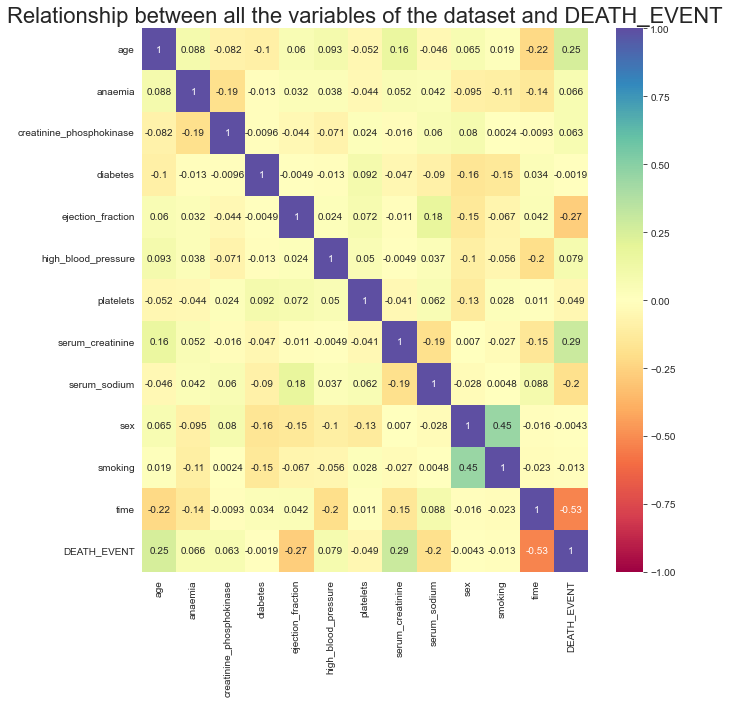

In [552]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)

#### Here we can see Death Event has a high negative correlation with "time" and somewhat negative correlation with "ejection_fraction", whereas here positive correlation with "serum_creatinine" and "age"

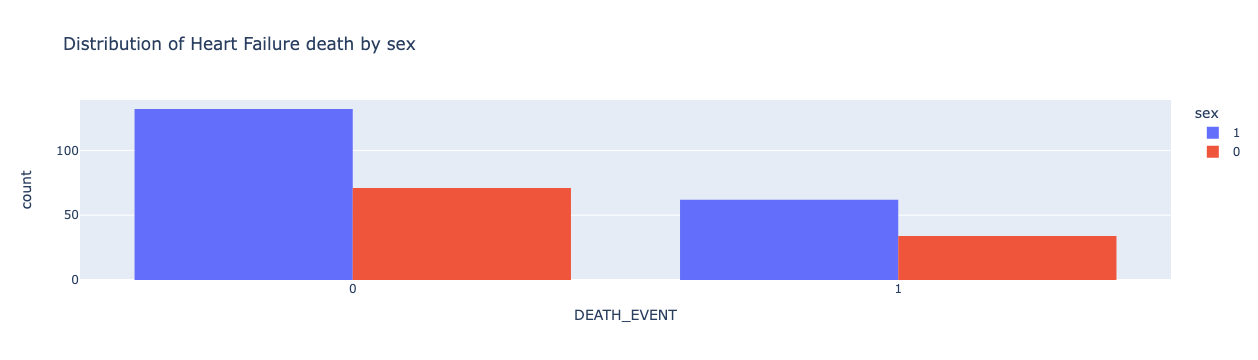

In [553]:
# Show the Distribution of Heart Failure death with respect to Male & Female as group
fig = px.histogram(df, x="DEATH_EVENT", title="Distribution of Heart Failure death by sex", color="sex", barmode='group', hover_data=df.columns)

fig.show()

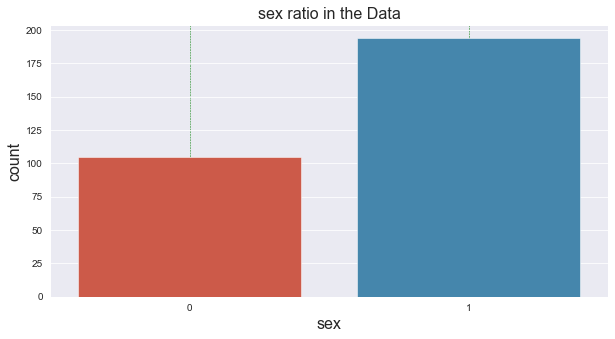

In [554]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='sex')
plt.xlabel('sex', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('sex ratio in the Data', fontsize=16)
plt.grid(axis='x', color='green', linestyle = '--', linewidth=0.5)

plt.show()

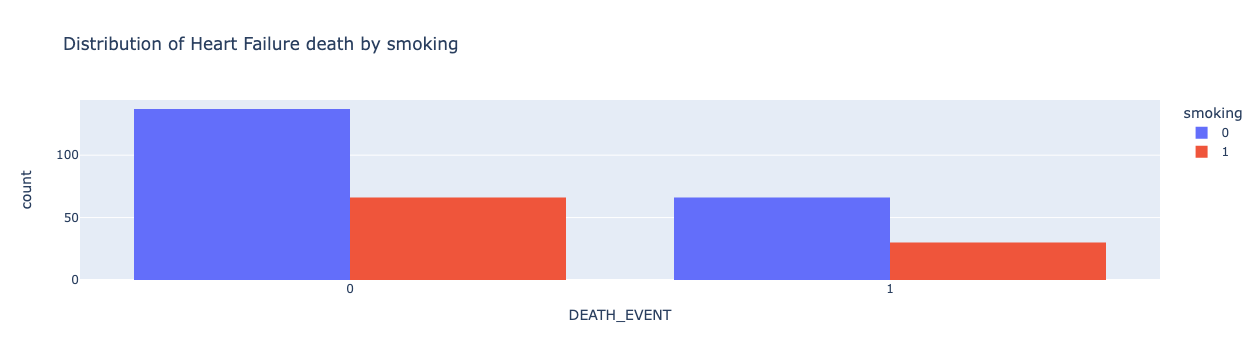

In [555]:
fig = px.histogram(df, x="DEATH_EVENT", title="Distribution of Heart Failure death by smoking ", color="smoking", barmode='group', hover_data=df.columns)

fig.show()

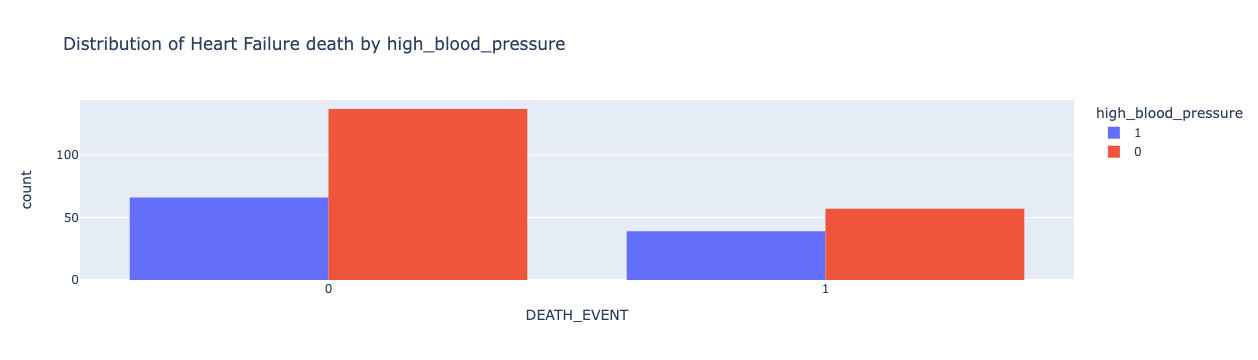

In [556]:
fig = px.histogram(df, x="DEATH_EVENT", title="Distribution of Heart Failure death by high_blood_pressure ", color="high_blood_pressure", barmode='group', hover_data=df.columns)

fig.show()

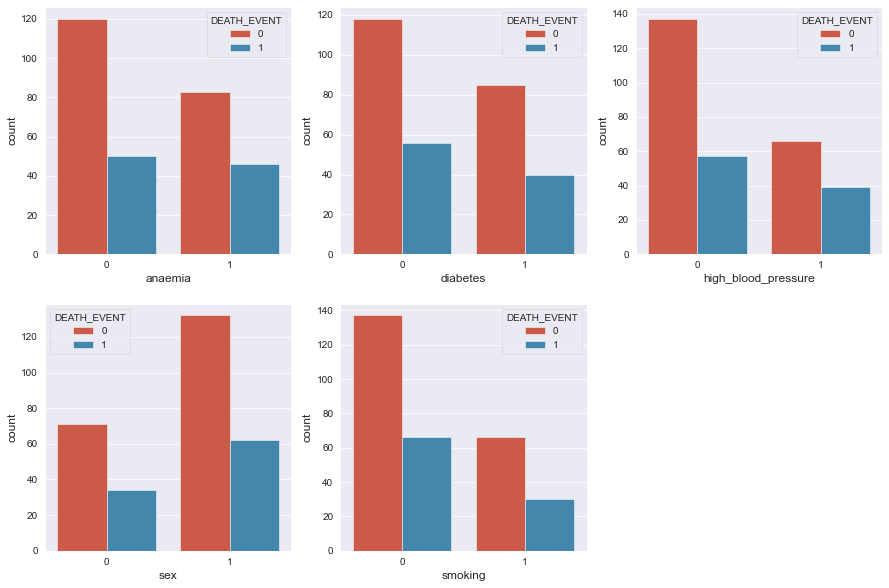

In [557]:
# plot the impact of catergorical variable on DEATH_EVENT
plt.figure(figsize=(15,10))
for i, cat in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=cat, hue="DEATH_EVENT")
plt.show()

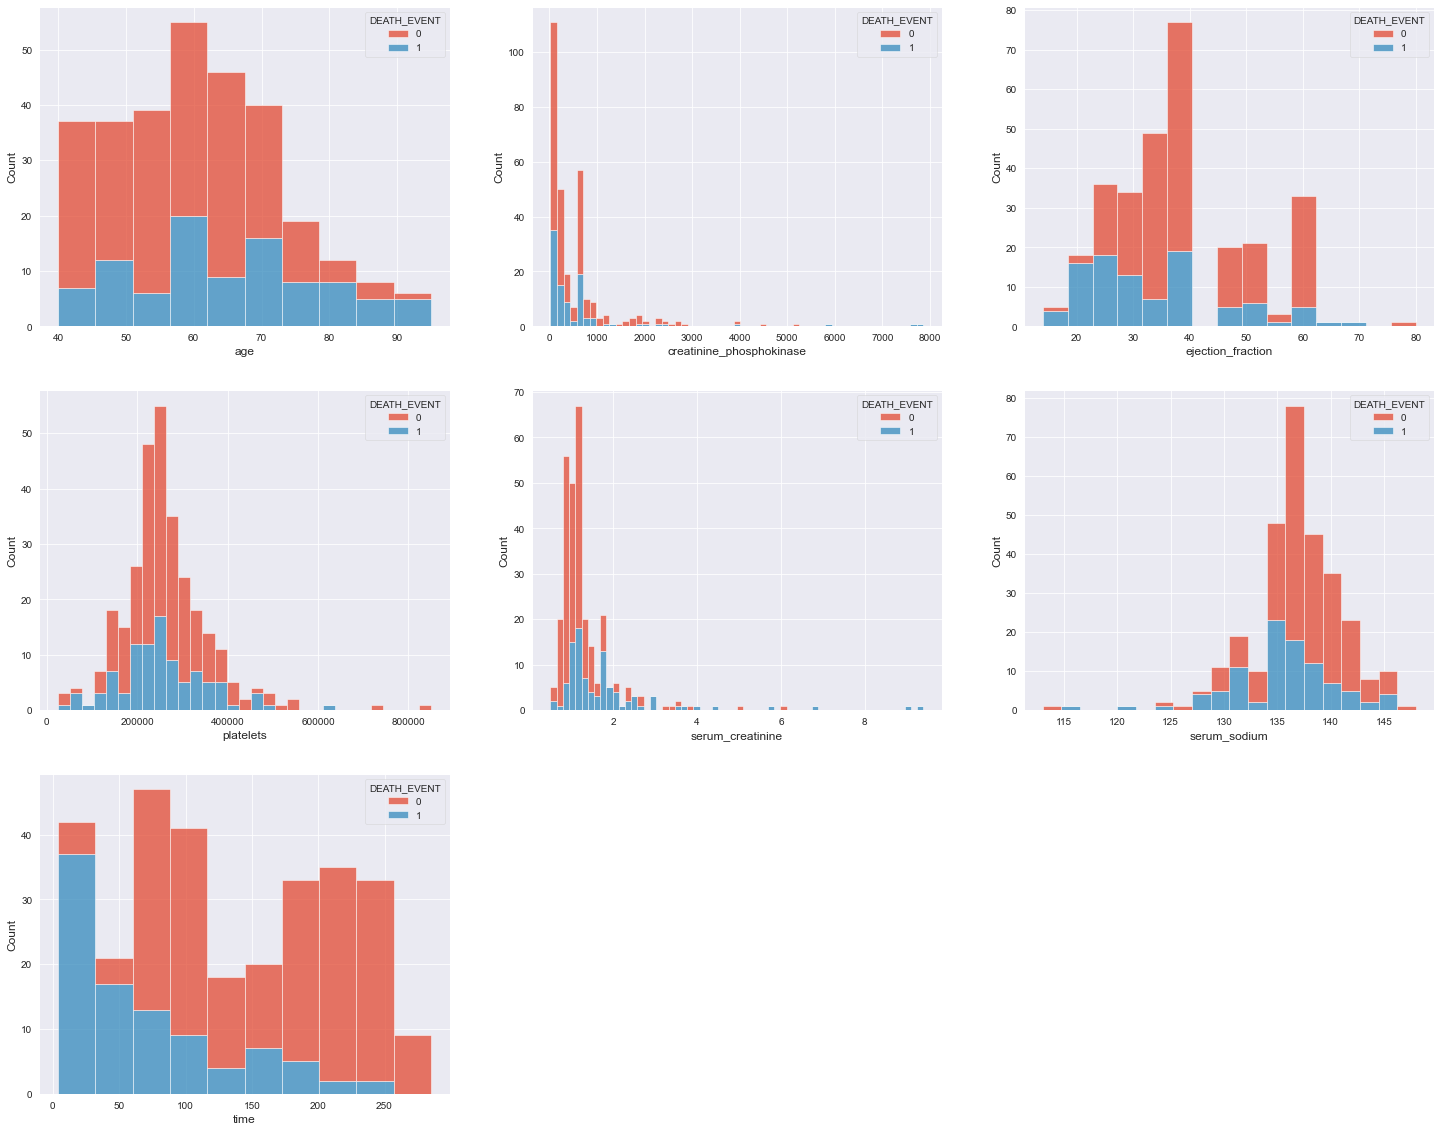

In [558]:
# Plotting the impact of continuous variables on DEATH_EVENT
plt.figure(figsize=(25,20))
for j, con in enumerate(con_col):
    plt.subplot(3, 3, j+1)
    sns.histplot(data=df, x=con, hue="DEATH_EVENT", multiple="stack")

plt.show()

[]

<Figure size 1440x720 with 0 Axes>

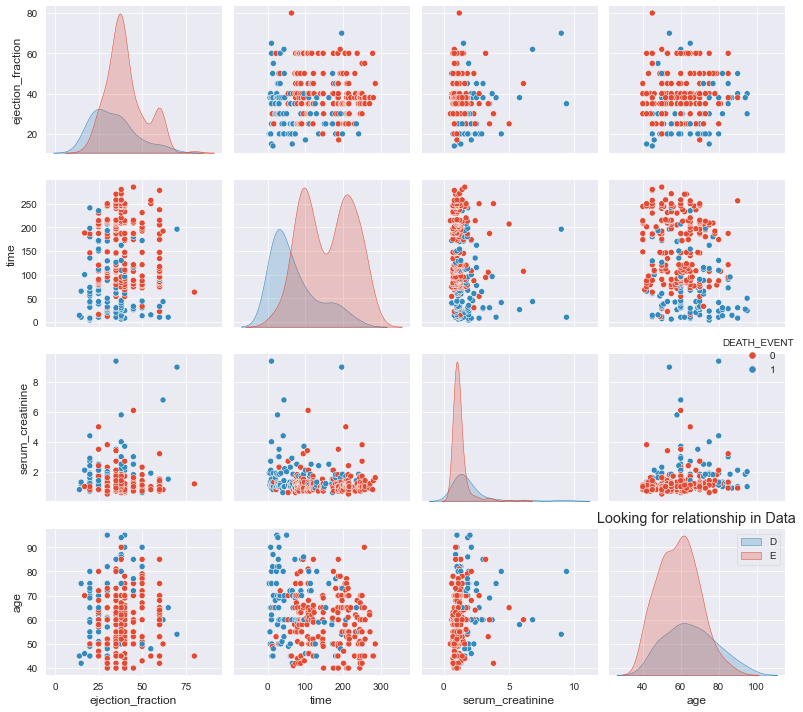

In [559]:
plt.figure(figsize=(20,10))

sns.pairplot(df,hue="DEATH_EVENT", diag_kind = "kde",kind = "scatter", vars=["ejection_fraction", "time", "serum_creatinine", "age"])  #from heatmap above
plt.title("Looking for relationship in Data")
plt.legend("DEATH_EVENT")
plt.tight_layout()
plt.plot()

#### The more follow-up time, the less death caused by heart failure.

### Now to check the 『linearity』 of each variables, it is a good practice to plot distribution graph and look for skewness of features. 

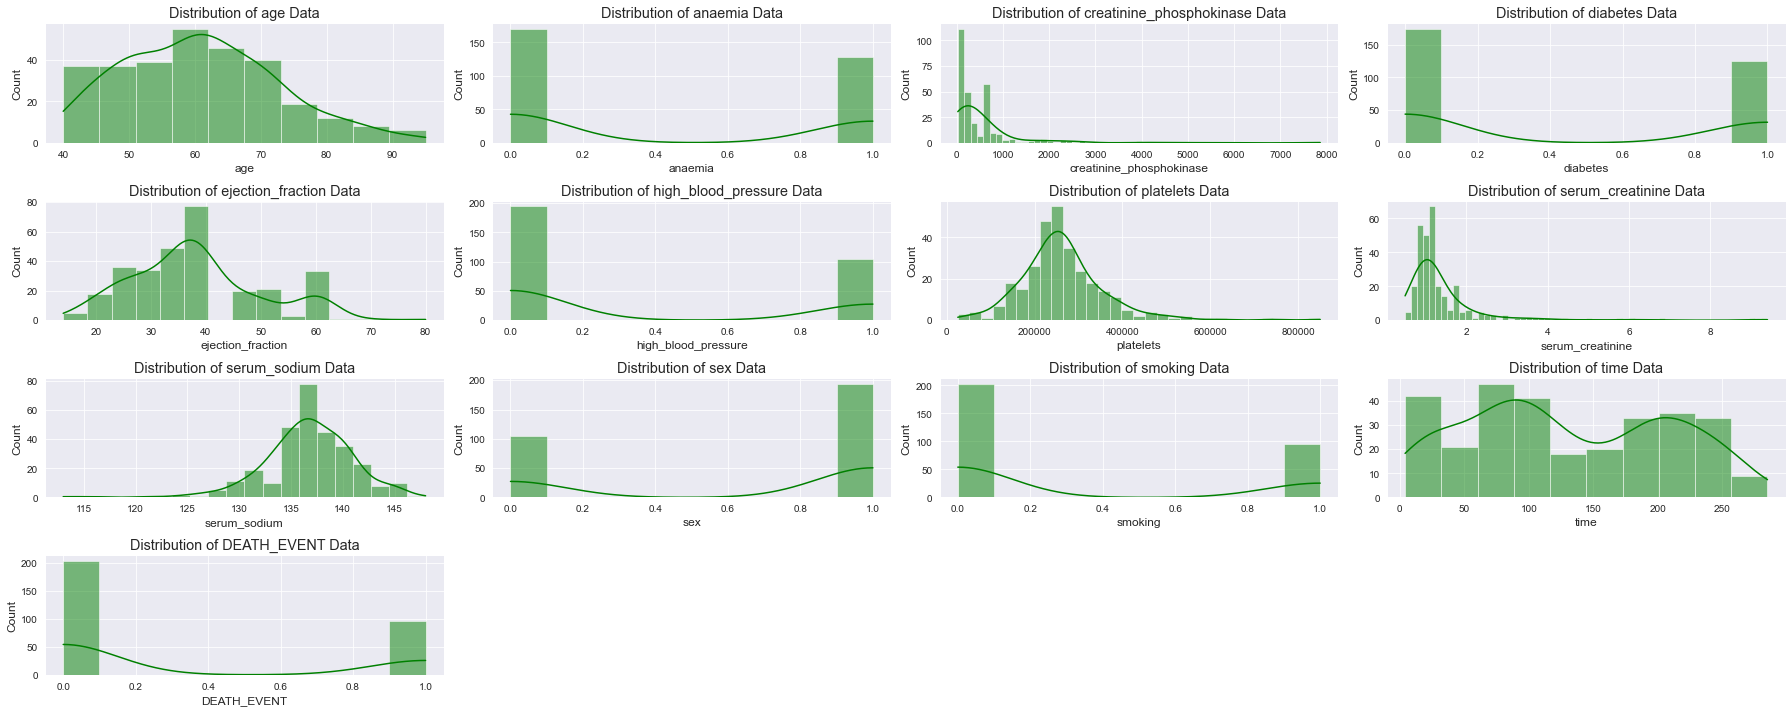

In [560]:
plt.figure(figsize=(25,10))

for i ,col in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(df[col], kde=True, color='green')
    plt.tight_layout()
    plt.plot()

# outliers

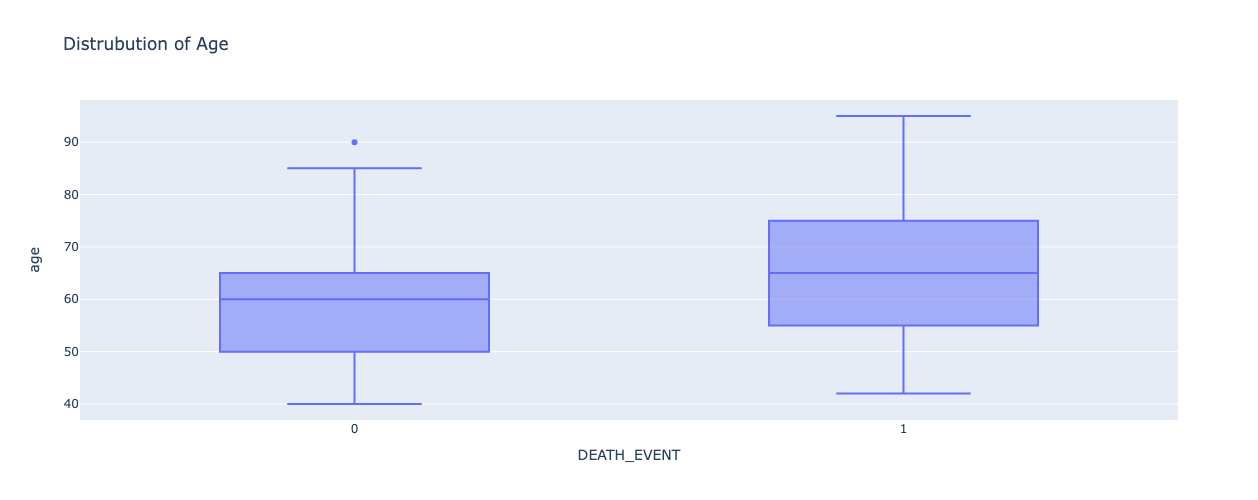

<Figure size 1800x1440 with 0 Axes>

In [561]:
plt.figure(figsize=(25,20))
fig = px.box(df, y="age", x="DEATH_EVENT",title=f"Distrubution of Age",width=500, height=500)
fig.show()

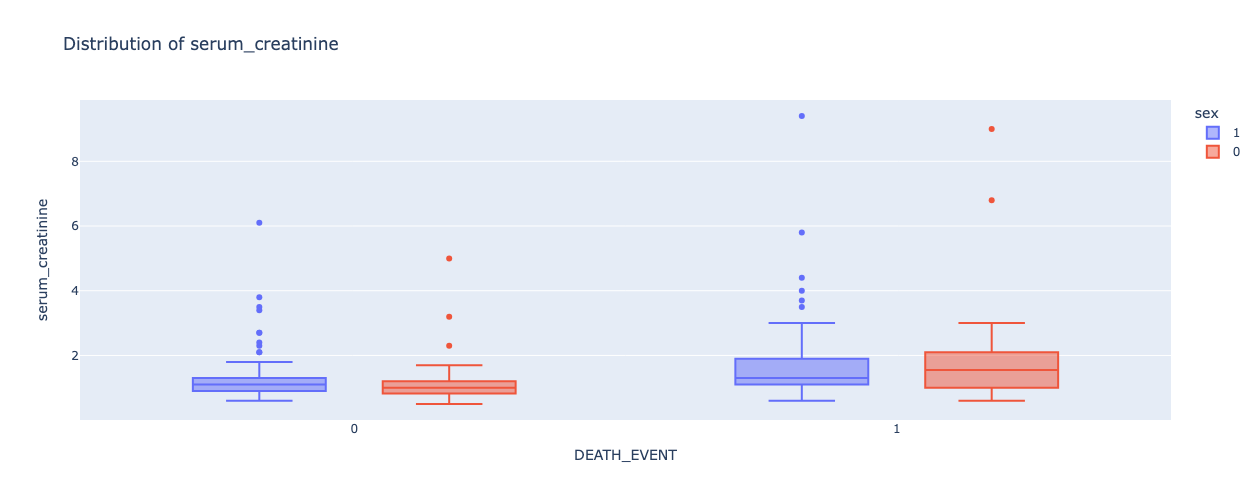

In [562]:
fig = px.box(df, y="serum_creatinine", x="DEATH_EVENT", title=f'Distribution of serum_creatinine', color="sex",width=500, height=500)

fig.show()

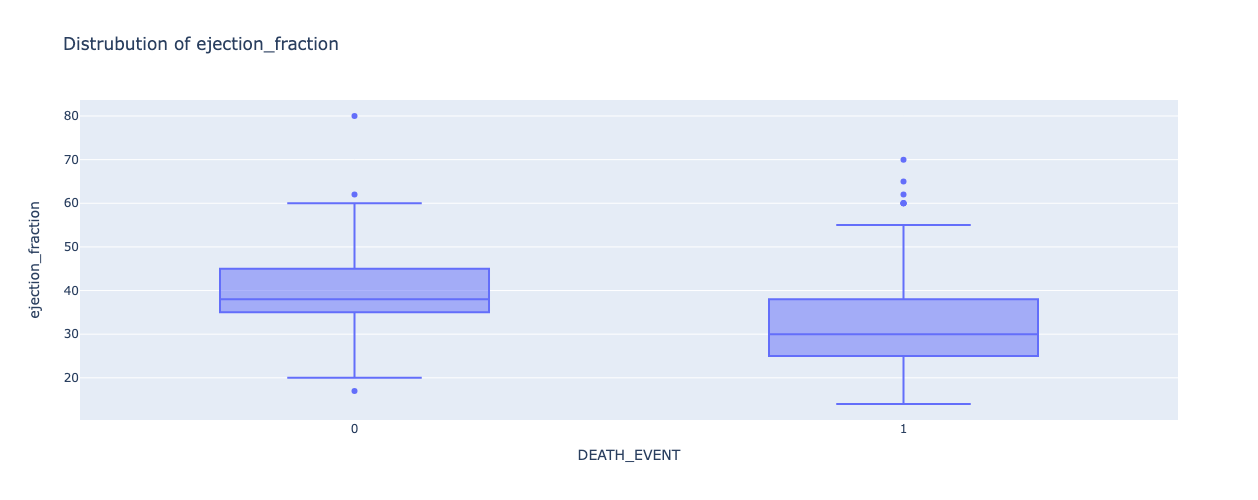

In [563]:
fig = px.box(df,y="ejection_fraction",x="DEATH_EVENT",title=f"Distrubution of ejection_fraction",width=500, height=500)
fig.show()

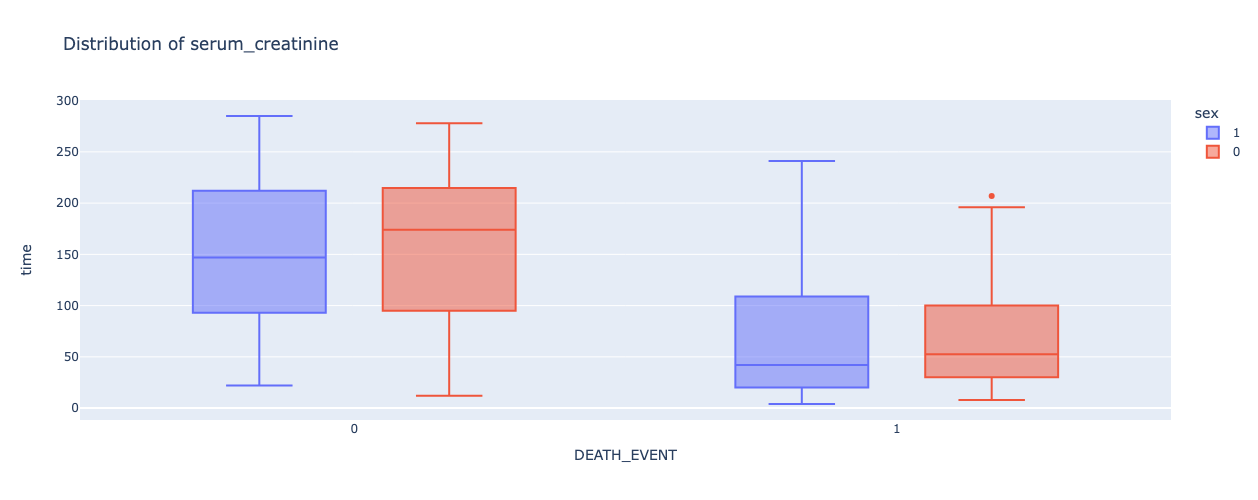

In [564]:
fig = px.box(df, y="time", x="DEATH_EVENT", title=f'Distribution of serum_creatinine', color="sex",width=500, height=500)

fig.show()

# Data Preprocessing
+ Handling Null Values
+ Features Scaling 
+ Handling Categorical Variables

## 1. Handling Null Values

In [565]:
# check for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [566]:
# Checking for NULLs in the data
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### So we can see our data does not have any null values.

## 2. Feature Scaling

## 3. Handling Categorical Variables

In [567]:
df[cat_col].head()
for col in cat_col:
    print(f"The distribution of categorical values in the {col} is: ")
    print(df[col].value_counts())

The distribution of categorical values in the anaemia is: 
0    170
1    129
Name: anaemia, dtype: int64
The distribution of categorical values in the diabetes is: 
0    174
1    125
Name: diabetes, dtype: int64
The distribution of categorical values in the high_blood_pressure is: 
0    194
1    105
Name: high_blood_pressure, dtype: int64
The distribution of categorical values in the sex is: 
1    194
0    105
Name: sex, dtype: int64
The distribution of categorical values in the smoking is: 
0    203
1     96
Name: smoking, dtype: int64


# Training our Machine Learning Model :

In [568]:
#劃分數據集
x = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine", "serum_sodium", "time"]]
y = df["DEATH_EVENT"]

In [569]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [570]:
# 特徵工程Feature Scaling - Standardization#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [571]:
# A List to save all the values from different model's accurancy for comparison using bar charts
accuracy_list = []

## NON-TREE BASED ALGORITHMS on categorical data

### 1. Using Logistic Regression :

In [572]:
from sklearn.linear_model import LogisticRegression

# classification預估器
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_predict = lr_model.predict(x_test_scaled)
# Accurancy score
lr_accuracy = round(accuracy_score(lr_predict, y_test), 4) *100 #percentage
print(f"The accuracy score: {lr_accuracy} ")

# 查看分類報告
print(classification_report(y_test, lr_predict))
# AUC計算
auc = round(roc_auc_score(y_test, lr_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(lr_accuracy)

The accuracy score: 87.78 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.78      0.75      0.77        24

    accuracy                           0.88        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.88      0.88      0.88        90

The AUC for model : 83.71


### 2. Using Naive Bayers :

In [573]:
from sklearn.naive_bayes import GaussianNB

# classification預估器
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_predict = nb_model.predict(x_test_scaled)
# Accurancy score
nb_accuracy = round(accuracy_score(nb_predict, y_test), 4) *100 #percentage
print(f"The accuracy score: {nb_accuracy} ")

# 查看分類報告
print(classification_report(y_test, nb_predict))
# AUC計算
auc = round(roc_auc_score(y_test, nb_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(nb_accuracy)

The accuracy score: 82.22 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.72      0.54      0.62        24

    accuracy                           0.82        90
   macro avg       0.78      0.73      0.75        90
weighted avg       0.81      0.82      0.81        90

The AUC for model : 73.3


### 3. Using SVM (Support Vector Machines) :

In [574]:
from sklearn.svm import SVC

# classification預估器
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_predict = svc_model.predict(x_test_scaled)
# Accurancy score
svc_accuracy = round(accuracy_score(svc_predict, y_test), 4) *100 #percentage
print(f"The accuracy score: {svc_accuracy} ")

# 查看分類報告
print(classification_report(y_test, svc_predict))
# AUC計算
auc = round(roc_auc_score(y_test, svc_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(svc_accuracy)

The accuracy score: 86.67 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        66
           1       0.75      0.75      0.75        24

    accuracy                           0.87        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.87      0.87      0.87        90

The AUC for model : 82.95


### 4. Using K-nearest Neighbors

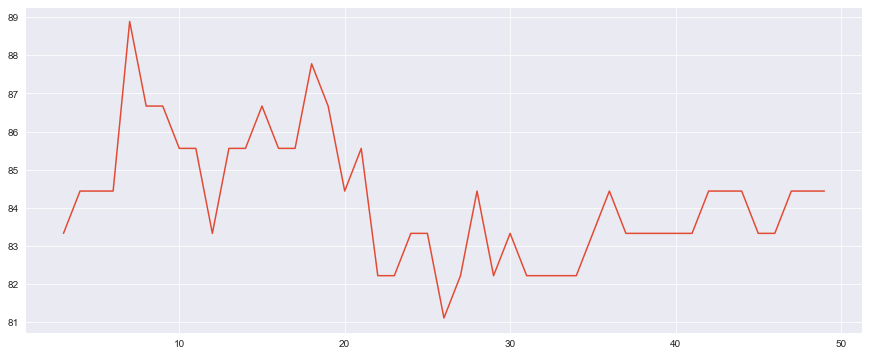

In [575]:
# Find the optimal values of k
from sklearn.neighbors import KNeighborsClassifier
knn_list = []
for k in range(3, 50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_predict = knn_model.predict(x_test_scaled)
    knn_accuracy = round(accuracy_score(knn_predict, y_test), 4)*100
    knn_list.append(knn_accuracy)
k = np.arange(3, 50)
plt.plot(k,knn_list)
plt.show()

In [576]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_scaled, y_train)
knn_predict = knn_model.predict(x_test_scaled)
knn_accuracy = round(accuracy_score(knn_predict, y_test), 4)*100
print(f"The accuracy score: {knn_accuracy} ")

# 查看分類報告
print(classification_report(y_test, knn_predict))
# AUC計算
auc = round(roc_auc_score(y_test, knn_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(knn_accuracy)

The accuracy score: 88.89 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        66
           1       0.85      0.71      0.77        24

    accuracy                           0.89        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.89      0.89      0.89        90

The AUC for model : 83.14


## TREE BASED ALGORITHMS on categorical data

### 1. Using Decision Tree Classifier

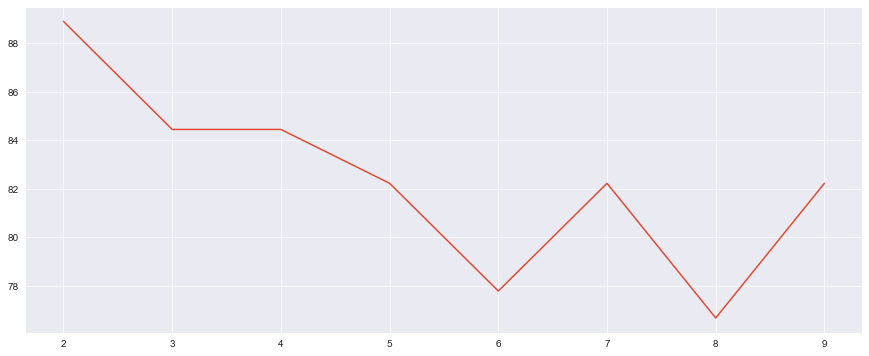

In [577]:
# Find the optimal value of max_leaf_nodes and max_depth
from sklearn.tree import DecisionTreeClassifier
dt_list = []
for t in range(2, 10):
    dt_model = DecisionTreeClassifier(criterion="entropy",random_state=0, max_depth = t) #max_leaf_nodes = t
    dt_model.fit(x_train_scaled, y_train)
    dt_predict = dt_model.predict(x_test_scaled)
    dt_accuracy = round(accuracy_score(dt_predict, y_test), 4)*100
    dt_list.append(dt_accuracy)
t = list(range(2, 10))    
plt.plot(t, dt_list)
plt.show()

In [578]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2, max_leaf_nodes=3)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
print(f"The accuracy score: {dt_accuracy} ")

# 查看分類報告
print(classification_report(y_test, dt_predict))
# AUC計算
auc = round(roc_auc_score(y_test, dt_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(dt_accuracy)

The accuracy score: 88.89 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        66
           1       0.67      0.67      0.67        24

    accuracy                           0.82        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.82      0.82      0.82        90

The AUC for model : 77.27000000000001


### 2. Using Random Forest Classifier

In [579]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier() # 不在手動填，而是依靠底下的grid search和cv去幫忙決定n_estimators樹木要多少
# 加入網格搜索與交叉驗證
# 參數準備
param_grid = [
    {"n_estimators": [10, 20, 30, 40, 50], "max_depth":[None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 20, 30, 40, 50]}],
             return_train_score=True, scoring='accuracy')

In [580]:
final_clf = grid_search.best_estimator_
print("最好的参数模型:\n", final_clf)

最好的参数模型:
 RandomForestClassifier(max_depth=10, n_estimators=50)


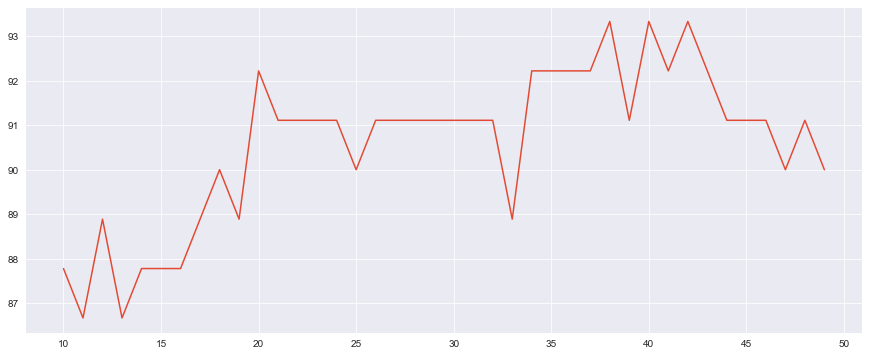

In [581]:
# Find the optimal value of n_estimators
from sklearn.ensemble import RandomForestClassifier
rf_list = []
for r in range(10, 50):
    rf_model = RandomForestClassifier(criterion="entropy", random_state=0, n_estimators = r)
    rf_model.fit(x_train_scaled, y_train)
    rf_predict = rf_model.predict(x_test_scaled)
    rf_accuracy = round(accuracy_score(rf_predict, y_test), 4)*100
  
    rf_list.append(rf_accuracy)
t = list(range(10, 50))    
plt.plot(t, rf_list)
plt.show()

In [582]:
rf_model = RandomForestClassifier(criterion="entropy", random_state=0, n_estimators = 40)
rf_model.fit(x_train_scaled, y_train)
rf_predict = rf_model.predict(x_test_scaled)
rf_accuracy = round(accuracy_score(rf_predict, y_test), 4)*100
print(f"The accuracy score: {rf_accuracy} ")

# 查看分類報告
print(classification_report(y_test, rf_predict))
# AUC計算
auc = round(roc_auc_score(y_test, rf_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(rf_accuracy)

The accuracy score: 93.33 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.91      0.83      0.87        24

    accuracy                           0.93        90
   macro avg       0.93      0.90      0.91        90
weighted avg       0.93      0.93      0.93        90

The AUC for model : 90.14999999999999


### 3. Using XGBoost

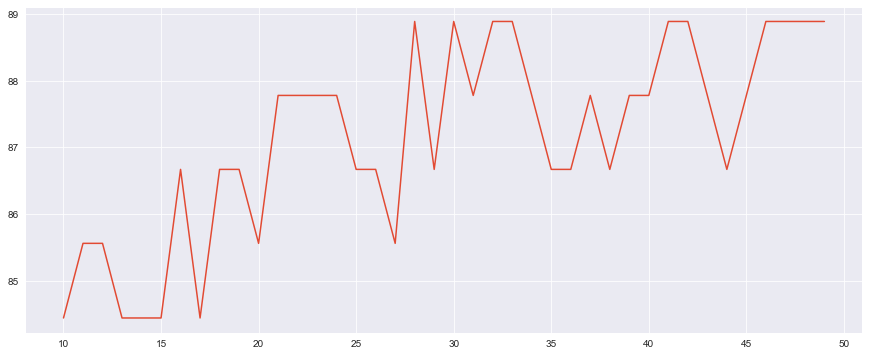

In [583]:
# Find the optimal value of n_estimators
from xgboost import XGBClassifier 

xg_list = []
for x in range(10, 50):
    xg_model = XGBClassifier(n_estimators = x, max_depth=12, subsample=0.7)
    xg_model.fit(x_train_scaled, y_train)
    xg_predict = xg_model.predict(x_test_scaled)
    xg_accuracy = round(accuracy_score(xg_predict, y_test), 4)*100
  
    xg_list.append(xg_accuracy)
xg = list(range(10, 50))    
plt.plot(xg, xg_list)
plt.show()

In [584]:
xg_model = XGBClassifier(n_estimators = 30, max_depth=12, subsample=0.7)
xg_model.fit(x_train_scaled, y_train)
xg_predict = xg_model.predict(x_test_scaled)
xg_accuracy = round(accuracy_score(xg_predict, y_test), 4)*100
print(f"The accuracy score: {xg_accuracy} ")

# 查看分類報告
print(classification_report(y_test, xg_predict))
# AUC計算
auc = round(roc_auc_score(y_test, xg_predict), 4) *100
print(f"The AUC for model : {auc}")

accuracy_list.append(xg_accuracy)

The accuracy score: 88.89 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.79      0.79      0.79        24

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90

The AUC for model : 85.8


In [585]:
accuracy_list

[87.78, 82.22, 86.67, 88.89, 88.89, 93.33, 88.89]

In [586]:
models = ["Logistic Regression", "Naive Bayes", "SVM", "KNearestNeighbours", "DecisionTree", "RandomForest", "XGBOOST" ]

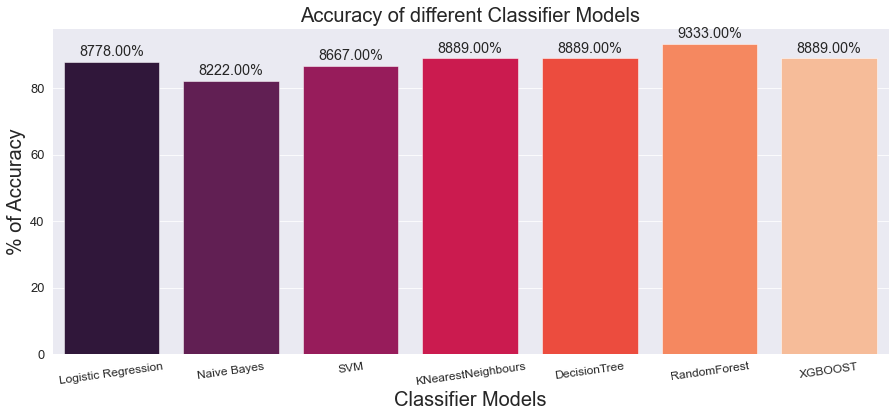

In [587]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=accuracy_list, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()